# Titanic Dataset Analysis

#### DSC 140
#### Leo Sanchez 




___

In [ ]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import *

In [78]:
# Uploading data file
titanic = pd.read_csv('/Users/leo/Downloads/titanic_train.csv')

In [79]:
# Looking at the first 5 lines of the data set
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [81]:
# Dropping na values 
titanic.dropna()
titanic.dropna(subset=['Parch','Cabin'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
# Assigning variable names to each column for better sintax
passangerld = titanic['PassengerId']
survived = titanic["Survived"]
Pclas = titanic['Pclass']
name = titanic['Name']
sex = titanic['Sex']
age = titanic['Age']
SibSP = titanic['SibSp']
Parch = titanic['Parch']
ticket = titanic['Ticket']
Fare = titanic['Fare']
Cabin = titanic['Cabin']
Emabarked = titanic['Embarked']

Text(0.5, 1.0, 'Number of Passangers in Age Ranges')

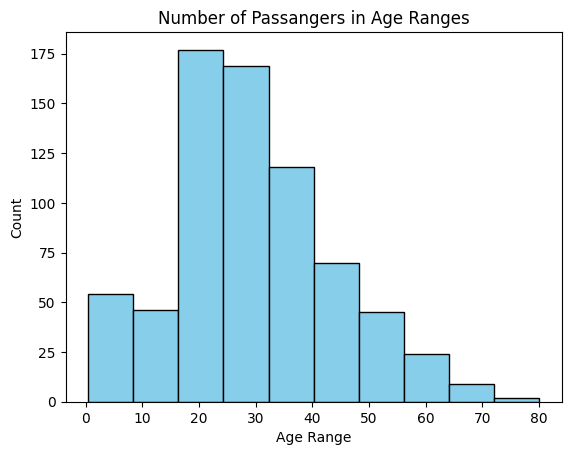

In [83]:
plt.figure()
plt.hist(age,bins=10, color='skyblue',edgecolor='black')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of Passangers in Age Ranges')

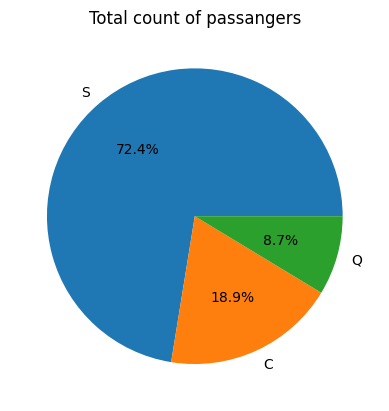

In [84]:
# Correlation bewteen survival and embarked location
Embarked_counts = pd.Series(titanic['Embarked']).value_counts()
plt.figure()
plt.pie(Embarked_counts, labels=Embarked_counts.index, autopct='%1.1f%%')
plt.title('Total count of passangers')
plt.show()

In [85]:
filtered_data = pd.DataFrame({'Age': age, 'Fare': Fare}).dropna()
age = filtered_data['Age']
Fare = filtered_data['Fare']

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


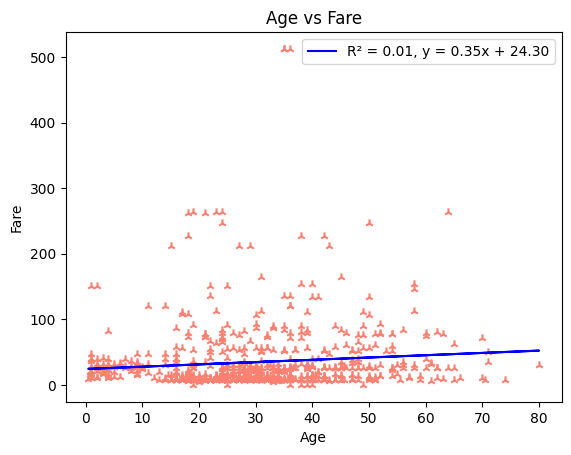

In [89]:
# Scatter plot Age vs Fare
plt.figure()
plt.scatter(age, Fare, color = 'salmon', marker='2')
slope, intercept, r_value, p_value, std_err = linregress(age, Fare)
plt.plot(age, slope * np.array(age) + intercept, color='blue', label=f'R² = {r_value**2:.2f}, y = {slope:.2f}x + {intercept:.2f}')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [87]:
# Pivot table comparing the Fare bewtween sex and Pclass
df_pt = pd.pivot_table(titanic, values="Fare",\
                              columns=["Sex"], index=["Pclass"],\
                              aggfunc="mean")
print(df_pt)

Sex         female       male
Pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633


'\nthe plot shows that most of the male passangers died, and that most female passangers survived\n0 means that they died and 1 means that they survived according to the information in the website the data file came from\n'

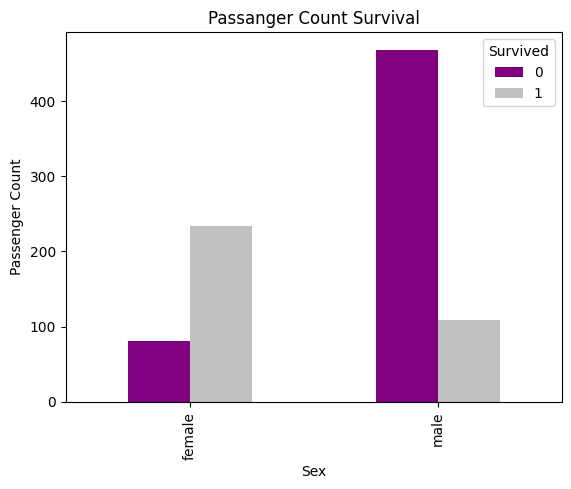

In [88]:
# Pivot table counting the passangers that survived depending on the sex
df_pt = pd.pivot_table(titanic, values="PassengerId",\
                              columns=["Survived"], index=["Sex"],\
                              aggfunc='count')

# Bar graph for Pivot table
df_pt.plot(kind='bar', xlabel='Sex',ylabel='Passenger Count',title='Passanger Count Survival', color= ['Purple', 'Silver'])
'''
the plot shows that most of the male passangers died, and that most female passangers survived
0 means that they died and 1 means that they survived according to the information in the website the data file came from
'''

In [ ]:
# Pivot table counting the passengers that survived depending on the sex
df_pt = pd.pivot_table(titanic, values="PassengerId", columns=["Survived"], index=["Sex"], aggfunc='count')

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(df_pt)

# Display results
print(df_pt)
print("p-value:", p)
print("Expected frequencies:\n", expected)

Survived    0    1
Sex               
female     81  233
male      468  109
p-value: 1.1973570627755645e-58
Expected frequencies:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


Sex         female       male
Pclass                       
1       106.125798  67.226127
2        21.970121  19.741782
3        16.118810  12.661633


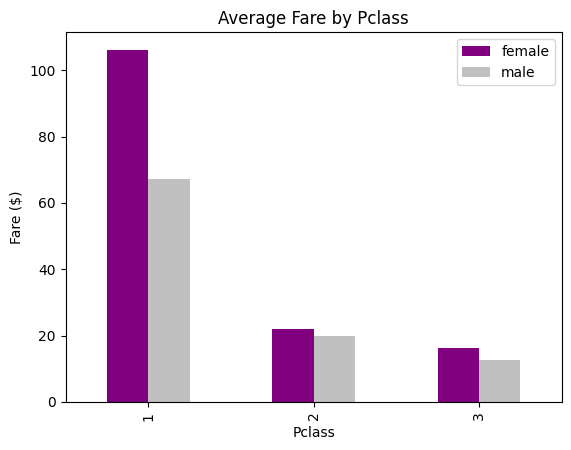

In [97]:
# Pivot table comparing the Fare bewtween sex and Pclass
df_pt = pd.pivot_table(titanic, values="Fare",\
                              columns=["Sex"], index=["Pclass"],\
                              aggfunc="mean")
print(df_pt)
# Bar plot for the pivot table above to have a visual representation 
df_pt.plot(kind='bar', xlabel= 'Pclass', ylabel='Fare ($)',title='Average Fare by Pclass',color= ['Purple', 'Silver'])
plt.legend(loc='upper right')